    Titanic Survival Prediction

---

### **Project Proposal: Titanic Survival Prediction**

---

#### **Introduction:**
This project aims to utilize machine learning techniques to build a model that can predict whether a passenger survived the tragic sinking of the Titanic. This is a famous competition in the field of machine learning, where the goal is to explore the relationships between various demographic and social factors that may have affected survival probability.

---

#### **Project Objective:**
The objective of this project is to:
- Build a predictive model using a dataset that includes passenger information such as gender, age, ticket class, embarkation port, and more.
- Identify key factors that significantly impact survival chances.
- Provide a machine learning solution to predict the survival outcomes of passengers in an unseen test dataset.

---

#### **Dataset:**
The project relies on the **Titanic dataset**, which contains the following columns:
- **Survived:** The target variable (0 = Died, 1 = Survived).
- **Pclass:** Ticket class (1 = First class, 2 = Second class, 3 = Third class).
- **Name:** Passenger's name.
- **Sex:** Passenger's gender (Male, Female).
- **Age:** Passenger's age.
- **SibSp:** Number of siblings/spouses aboard the Titanic.
- **Parch:** Number of parents/children aboard the Titanic.
- **Fare:** The fare paid.
- **Embarked:** Embarkation port (C = Cherbourg, Q = Queenstown, S = Southampton).

---

#### **Methodology:**

1. **Stage 1: Data Exploration (Data Exploration):**
   - Study the general distribution of the data through visualizations like **histograms**, **box plots**, and **correlation matrices**.
   - Identify columns with missing values or outliers.

2. **Stage 2: Data Preprocessing:**
   - **Handling Missing Values:** Use techniques such as replacing missing values with the **median** (for age) and **mode** (for embarkation port) to deal with missing data.
   - **Handling Outliers**
   - **Feature Selection:** Drop irrelevant columns like `Name`, `Ticket`, and `PassengerId`.

3. **Stage 3: Encoding:**
   - Convert categorical features into numerical values using **Simple Encoding**.

4. **Stage 4: Model Building:**
   - Implement machine learning algorithms to build the predictive model.
   - Test different algorithms to identify the best-performing model.

5. **Stage 6: Prediction and Submission:**
   - Use the trained model to predict the survival status of passengers in the test dataset (`test.csv`).
   - Prepare the final submission file with predicted results for evaluation in the competition.

---

#### **Proposed Models:**
- **Decision Tree Classifier (DTC):** A versatile and interpretable model that is particularly well-suited for handling both numerical and categorical data.

- **K-Nearest Neighbors (KNN):**  A non-parametric method that works well for classification tasks, and can be fine-tuned using different distance metrics and the number of neighbors.

- **Naive Bayes (NB):**  A probabilistic model that is fast and effective, particularly for simple binary classification problems.

---

#### **Techniques and Tools:**
- **Programming Language:** Python
- **Libraries Used:** Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn
- **Machine Learning Techniques:** **Supervised Learning**, **Classification Models**

---

#### **Expected Outcomes:**
- The model is expected to achieve a high accuracy in predicting survival based on the available features.
- The anticipated performance for the Titanic competition model ranges between **78% and 85%** accuracy based on the factors being analyzed.

---

#### **Challenges:**
- **Missing Data:** Missing values could affect the model’s accuracy, and we will employ appropriate techniques to fill in missing data.
- **Outliers:** Extreme outliers might skew the results

---

#### **Expected Results:**
- Deliver a functional model capable of predicting survival outcomes for passengers in the Titanic disaster using an unseen test dataset.
- Analyze and identify the most significant factors influencing survival, such as **gender**, **ticket class**, and **age**.

---

### **Conclusion:**
The goal of this project is to build an effective machine learning model that can predict the survival status of passengers from the Titanic disaster. By applying various data processing techniques, machine learning algorithms, and feature engineering, we aim to create a highly accurate model and gain insights into the key factors that influenced survival.

---


### 1. **Importing Essential Libraries**

- In this step, we import the essential libraries we need to work with:
  - `numpy`: A library for mathematical operations and numerical analysis.
  - `pandas`: A library for data manipulation, such as reading data from files, cleaning, and analysis.
  - `seaborn`: A library for advanced plotting and data visualization.
  - `matplotlib`: A library for creating basic plots.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

---

### 2. **Reading the Data**

- In this step, we read CSV data files:
  - `df_train`: The training data.
  - `df_test`: The test data.
- Then, we display the first 5 rows of each dataset using `.head(5)` to review the content.


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Data File/Data/07_Titanic_Train_Data.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Data File/Data/07_Titanic_test_Data.csv')

In [ ]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


---

### 3. **Exploring the Data**

- We use several methods to explore the data:
  - `.info()`: To get information about the columns, data types, and non-null values.
  - `.describe().T`: To get basic statistics like mean, standard deviation, and transpose the results for clarity.
  - `.columns`: To list the column names.
  - `.shape`: To get the dimensions of the dataset (number of rows and columns).


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df_train.shape

(891, 12)




### **df_train** Data Summary

- The dataset contains **12 columns** and **891 rows**.
- The columns with **int64 values** are: **PassengerId, Survived, Pclass, SibSp, Parch**.
- The columns with **float64 values** are: **Age, Fare**.
- The columns with **object values** are: **Name, Sex, Ticket, Cabin, Embarked**.
- The columns with **missing values** are: **Age, Cabin, Embarked**.


### **df_test** Data Summary

- The dataset contains **11 columns** and **418 rows**.
- The columns with **int64 values** are: **PassengerId, Pclass, SibSp, Parch**.
- The columns with **float64 values** are: **Age, Fare**.
- The columns with **object values**  are: **Name, Sex, Ticket, Cabin, Embarked**.
- The columns with **missing values** are: **Age, Fare, Cabin**.



---

### 4. **Checking for Missing Values**

- We check for missing values in the training and test datasets using `.isnull().sum()` to see how many missing values exist in each column.
- If there are columns with missing values, we display them using the condition `missing_values > 0`.


In [ ]:
missing_values = df_train.isnull().sum()
missing_columns = missing_values[missing_values > 0]
missing_columns

,0
Age,177
Cabin,687
Embarked,2


In [ ]:
missing_values = df_test.isnull().sum()
missing_columns = missing_values[missing_values > 0]
missing_columns

,0
Age,86
Fare,1
Cabin,327


---

### 5. **Handling Missing Values**

- In this step, we handle the missing values by filling them:
  - For the `Age` column: We use the median value to fill the missing data.
  - For the `Embarked` column: We use the mode (most frequent value) to fill the missing data.
  - For the `Fare` column: We use the median value to fill the missing data.


In [ ]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())


---

### 6. **Checking for Missing Values After Handling**

- After handling the missing values, we check again to make sure there are no missing values using `.isnull().sum()` to verify that all missing values have been handled.


In [ ]:
df_train.isnull().sum().sort_values(ascending=False)

,0
Cabin,687
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0


In [ ]:
df_test.isnull().sum().sort_values(ascending=False)

,0
Cabin,327
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


---

### 7. **Dropping Unnecessary Columns**

- We drop unnecessary columns that may not be useful for analysis or model building:
  - `Cabin`, `Name`, `Ticket`, and `PassengerId`.


In [ ]:
df_train = df_train.drop('Cabin', axis=1)
df_test = df_test.drop('Cabin', axis=1)

df_train = df_train.drop('Name', axis=1)
df_test = df_test.drop('Name', axis=1)

df_train = df_train.drop('Ticket', axis=1)
df_test = df_test.drop('Ticket', axis=1)

df_train = df_train.drop('PassengerId', axis=1)

---

### 8. **Checking for Missing Values After Dropping Columns**

- We check for missing values again after dropping the unnecessary columns using `.isnull().sum()` to confirm that all missing values have been handled.


In [ ]:
missing_values = df_train.isnull().sum()
missing_columns = missing_values[missing_values > 0]
missing_columns

,0


In [ ]:
missing_values = df_test.isnull().sum()
missing_columns = missing_values[missing_values > 0]
missing_columns

,0



---

# Dividing the Data into Two Sections

### 📊 **Numerical Data**


### 🗂️ **Categorical Data**




---

### 9. **📊 Numerical Data**

- In this step, we select only the columns that contain numerical data (like integers and floats) using `select_dtypes` with the types `int64` and `float64`.


In [ ]:
num_train = df_train.select_dtypes(include=['int64', 'float64'])
num_train

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,28.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


---

### 10. **🗂️ Categorical Data**

- We display the number of unique values in each column using `value_counts()` to show the variety in categorical data.
- Then, we select the main categorical columns like `Survived`, `Pclass`, `Sex`, and others.


In [ ]:
for col in df_train.columns:
    unique_vals = df_train[col].value_counts()
    print(f'{col} has {len(unique_vals)} unique values')

Survived has 2 unique values
Pclass has 3 unique values
Sex has 2 unique values
Age has 88 unique values
SibSp has 7 unique values
Parch has 7 unique values
Fare has 248 unique values
Embarked has 3 unique values


In [ ]:
cat_train = df_train[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']]
cat_train

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,male,1,0,S
1,1,1,female,1,0,C
2,1,3,female,0,0,S
3,1,1,female,1,0,S
4,0,3,male,0,0,S
...,...,...,...,...,...,...
886,0,2,male,0,0,S
887,1,1,female,0,0,S
888,0,3,female,1,2,S
889,1,1,male,0,0,C


---

### 11. **Visualizing Numerical Columns**

- We display a correlation matrix between the numerical columns using `corr()` to understand the relationships between variables.
- This is visualized using a `heatmap` to show the strength of the relationships.


In [ ]:
correlation_matrix = num_train.corr()
correlation_matrix

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


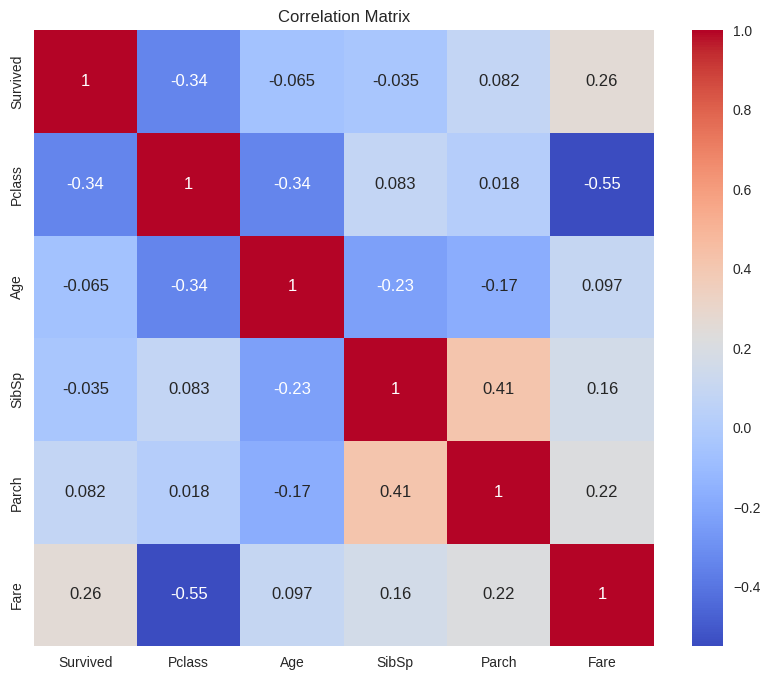

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Correlation Matrix Documentation

The correlation matrix displays the relationships between the variables in the Titanic passenger dataset.

#### Key Findings:
- **Strong negative correlation between Pclass and Fare**: This indicates that passengers in higher classes paid higher ticket fares.
- **Weak correlation between Age and other variables**: This suggests that age does not have a strong impact on survival or other factors.
- **Moderate correlation between Pclass and Survived**: This implies that passengers in higher classes were more likely to survive.



---

### 12. **Additional Visualizations for Numerical Columns**

- We display a `countplot` to visualize the distribution of survival by `Pclass`.
- We display a `countplot` to visualize the distribution of survival by `SibSp`.
- We display a `countplot` to visualize the distribution of survival by `Parch`.
- We display a `histplot` to visualize the distribution of Survival  by `Age`.

- We also display a `boxplot` to show the distribution of survival by `Fare` .


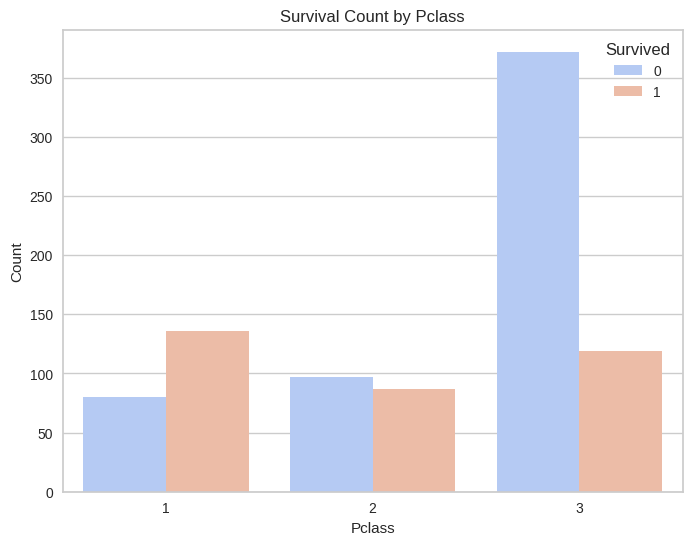

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=num_train, palette='coolwarm')
plt.title('Survival Count by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

#### **Image 1: Analysis of Survival Count by Pclass**  
**Description:**  
The image shows the analysis of survival count based on the passenger class (Pclass) on the Titanic.  
**Key Observations:**  
- **Pclass 1:** The highest survival rate among the three classes.  
- **Pclass 2:** Lower survival rate than Pclass 1 but still significantly higher than Pclass 3.  
- **Pclass 3:** The lowest survival rate, with a large number of passengers not surviving.  

**Conclusion:**  
Passengers in higher classes had a much better chance of survival, likely due to factors such as proximity to lifeboats, location on the ship, and social status.

---

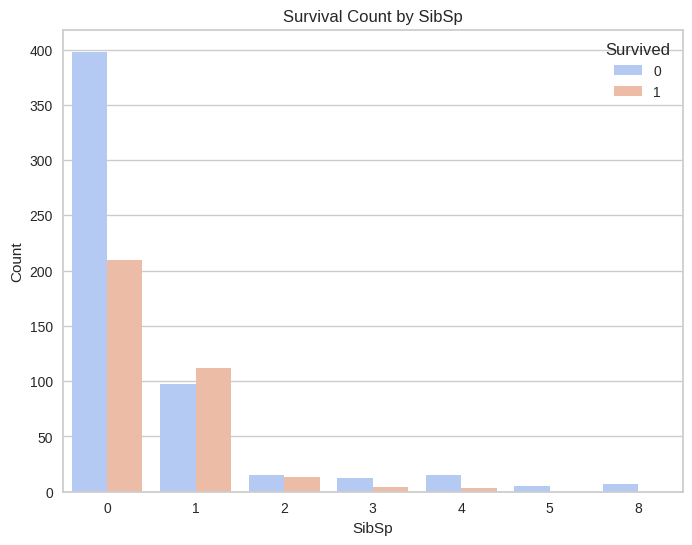

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='SibSp', hue='Survived', data=num_train, palette='coolwarm')
plt.title('Survival Count by SibSp')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

#### **Image 2: Analysis of Survival Count by SibSp (Number of Siblings/Spouses)**  
**Description:**  
The plot shows the distribution of survival count based on the number of siblings/spouses (SibSp) aboard the Titanic.  
**Key Observations:**  
- Most passengers had no siblings/spouses (SibSp = 0).
- The survival rate tends to decrease as the number of siblings/spouses increases.
- The lowest survival rate is for passengers with five siblings/spouses.
- Passengers with one sibling/spouse had a slightly higher survival rate than those with zero.  

**Conclusion:**  
Having more siblings or spouses aboard did not necessarily increase survival chances. In fact, passengers with larger groups of siblings/spouses had a lower survival rate, possibly due to limited lifeboat capacity and difficulty in evacuating larger families.

---

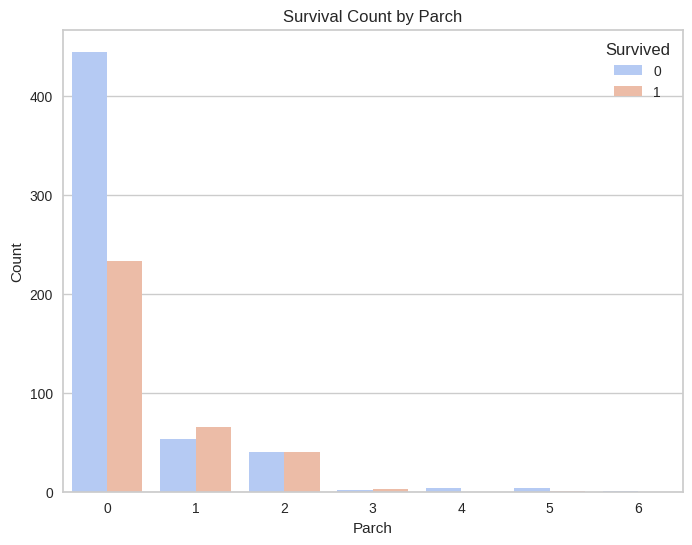

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Parch', hue='Survived', data=num_train, palette='coolwarm')
plt.title('Survival Count by Parch')
plt.xlabel('Parch')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

#### **Image 3: Survival Count by Parch (Number of Parents/Children)**  
**Description:**  
The graph shows the survival count based on the number of parents or children aboard (Parch).  
**Key Observations:**  
- Most passengers traveled without parents or children (Parch = 0).
- As the number of parents or children increased, the number of passengers decreased.
- Passengers with one parent or child had a higher survival rate than those without.
- Passengers with more than one parent or child had a lower survival rate.  

**Conclusion:**  
The presence of parents or children slightly increased the survival rate for passengers traveling with one parent or child. However, those with larger family groups had lower survival chances, possibly due to the challenges of evacuating larger families.

---

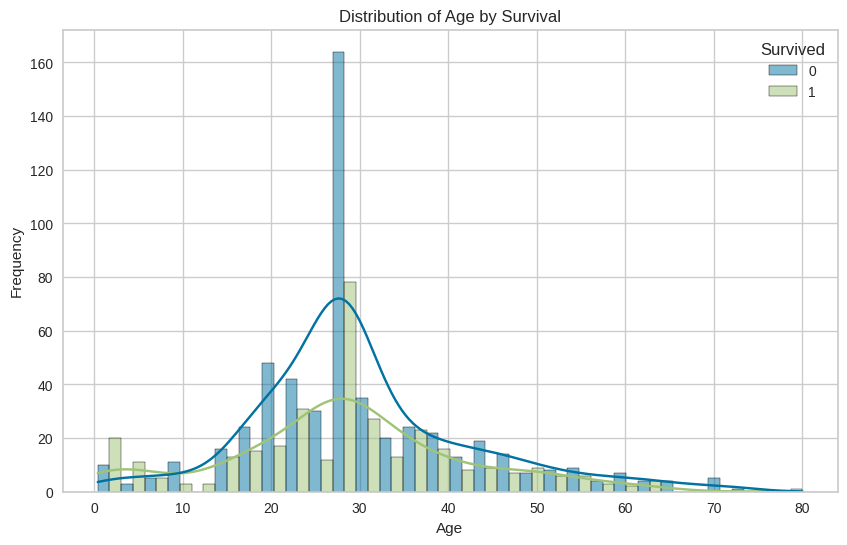

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='Age', hue='Survived', bins=30, kde=True , multiple='dodge')
plt.title('Distribution of Age by Survival')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### **Image 4: Age Distribution by Survival**  
**Description:**  
The histogram represents the age distribution of survivors and non-survivors on the Titanic.  
**Key Observations:**  
- Younger passengers (ages 0-30) had a higher survival rate.
- There is a peak around the age of 30 for those who perished.
- The survival probability decreased as age increased.  

**Conclusion:**  
Age was a significant factor in survival, with younger passengers being more likely to survive. This could be attributed to women and children being prioritized for lifeboat boarding, and younger individuals potentially having more mobility and strength during the evacuation.

---


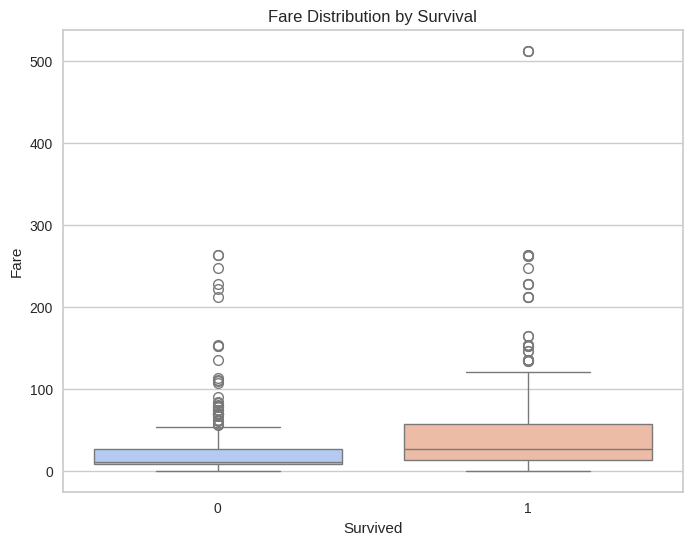

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Fare', data=num_train, palette='coolwarm')
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

#### **Image 5: Fare Distribution by Survival**  
**Description:**  
The boxplot shows the distribution of fares paid by survivors and non-survivors.  
**Key Observations:**  
- Survivors had a wider distribution of fares, with some outliers paying very high fares.
- The median fare for survivors is slightly higher than for non-survivors.
- Non-survivors had a more concentrated fare distribution, with fewer outliers paying high fares.  

**Conclusion:**  
Passengers who paid higher fares were more likely to survive, likely due to being in higher-class cabins with better access to lifeboats and quicker evacuation. However, this is a correlation and not necessarily causation.



---

### 13. **Checking for Outliers**

- We use `boxplot` to display outliers in the numerical columns. This plot shows the distribution and outliers for each column.


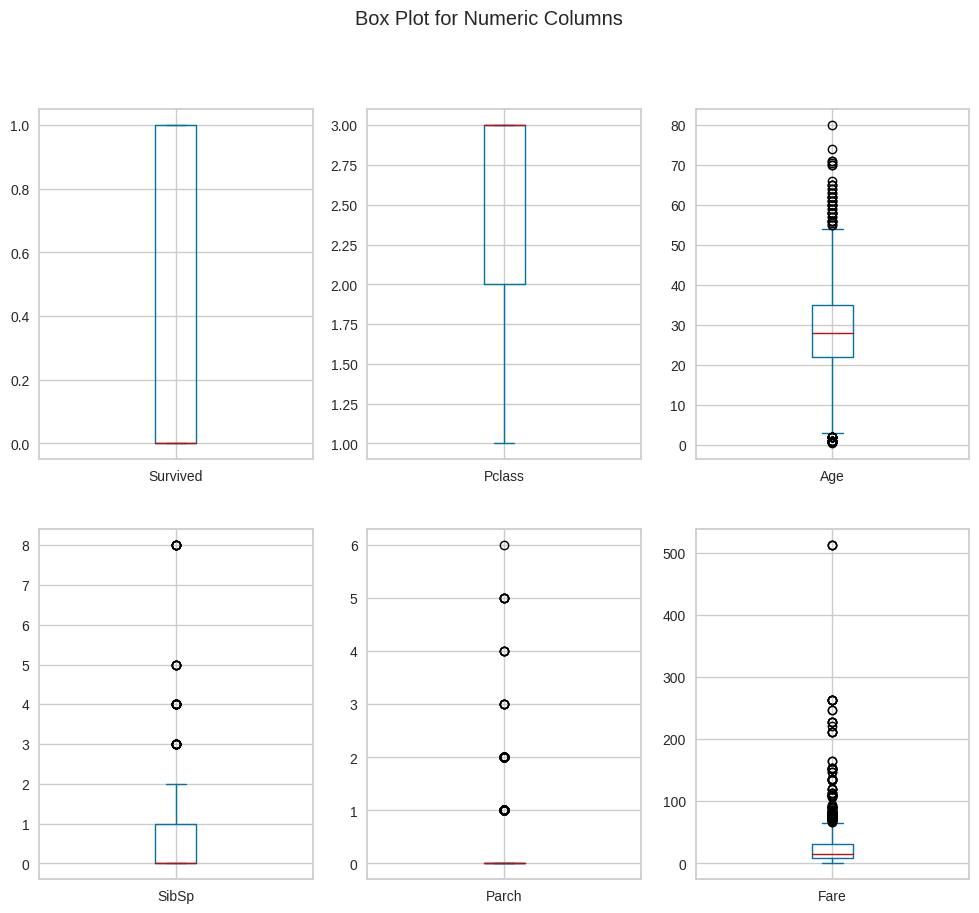

In [ ]:
num_train.plot(kind="box", subplots=True, layout=(2,3), figsize=(12, 10))
plt.suptitle("Box Plot for Numeric Columns")
plt.show()

---

### 14. **Handling Outliers**

- We handle the outliers using the IQR (Interquartile Range) method, where we identify values that fall outside of this range and adjust them to be within the acceptable limits.


In [ ]:
for col in num_train.columns:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_train[col] = np.where(df_train[col] < lower_bound, lower_bound, df_train[col])
    df_train[col] = np.where(df_train[col] > upper_bound, upper_bound, df_train[col])

---

### 15. **Visualizing Categorical Data**

- We display the distribution of survival by `Sex`, `Pclass`, and `Embarked` using `countplot`.
- These visualizations help understand the effect of these factors on survival.


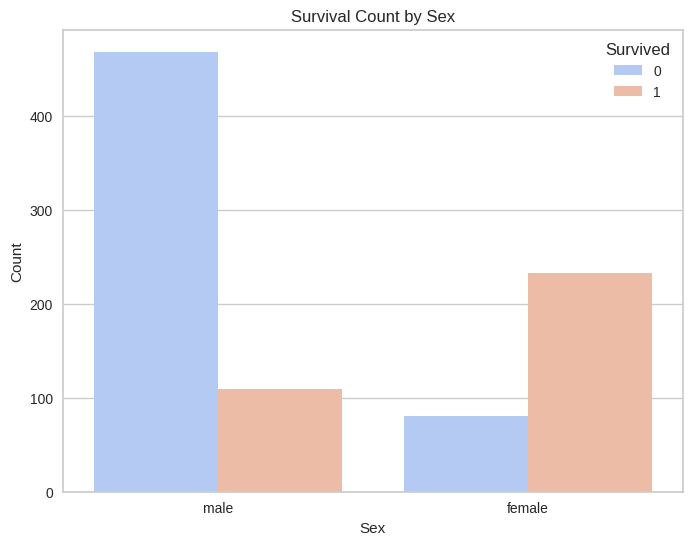

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=cat_train, palette='coolwarm')
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

#### **Image 1: Survival Count by Sex**  
**Description:**  
The chart shows the number of survivors and non-survivors, categorized by sex.  
**Key Observations:**  
- More males did not survive compared to the number of males who survived.
- More females survived than did not survive.  

**Conclusion:**  
Women had a higher survival rate than men, which aligns with the "women and children first" policy for lifeboat boarding.

---

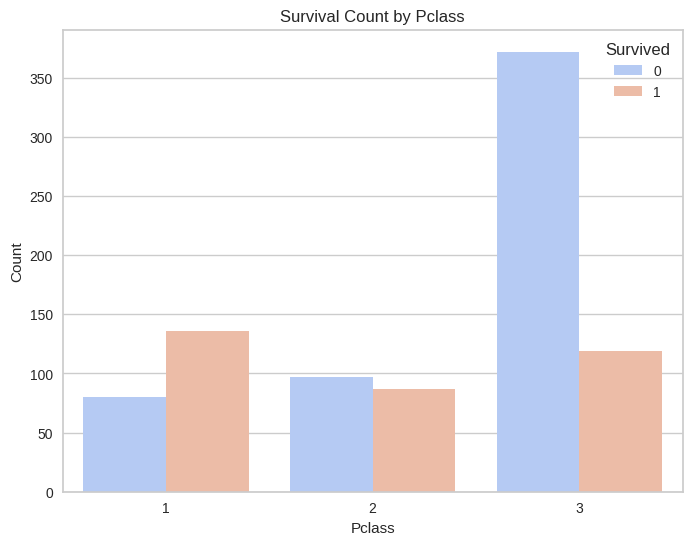

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=cat_train, palette='coolwarm')
plt.title('Survival Count by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

#### **Image 2: Survival Count by Pclass and Sex**  
**Description:**  
This bar chart represents the survival count based on the passenger class (Pclass) and sex.  
**Key Observations:**  
- More passengers in **Pclass 1** survived than died, both male and female.
- More passengers in **Pclass 3** died than survived, especially males.  

**Conclusion:**  
Social class had a significant impact on survival chances. Higher-class passengers, especially women in **Pclass 1**, had a better chance of survival.

---

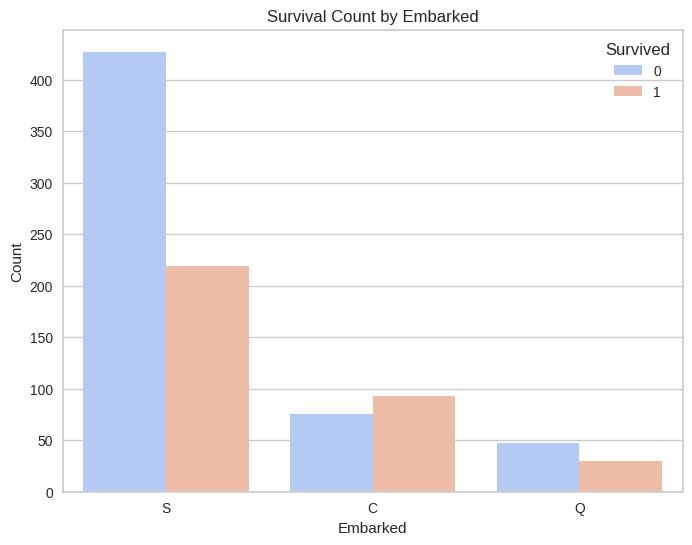

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', hue='Survived', data=cat_train, palette='coolwarm')
plt.title('Survival Count by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

#### **Image 3: Survival Count by Embarked (Port of Embarkation)**  
**Description:**  
The chart shows the survival count based on the embarkation port (S, C, and Q).  
**Key Observations:**  
- Passengers who embarked at port **S** had the highest number of deaths but also the highest number of survivors.
- Passengers who embarked at port **C** had a higher number of survivors than those who embarked at port **Q**.
- Passengers who embarked at port **C** had the best survival rate.  

**Conclusion:**  
Passengers who embarked at port **C** had the highest survival rate, suggesting that the location of embarkation may have influenced survival due to various logistical factors.

---

<Figure size 800x600 with 0 Axes>

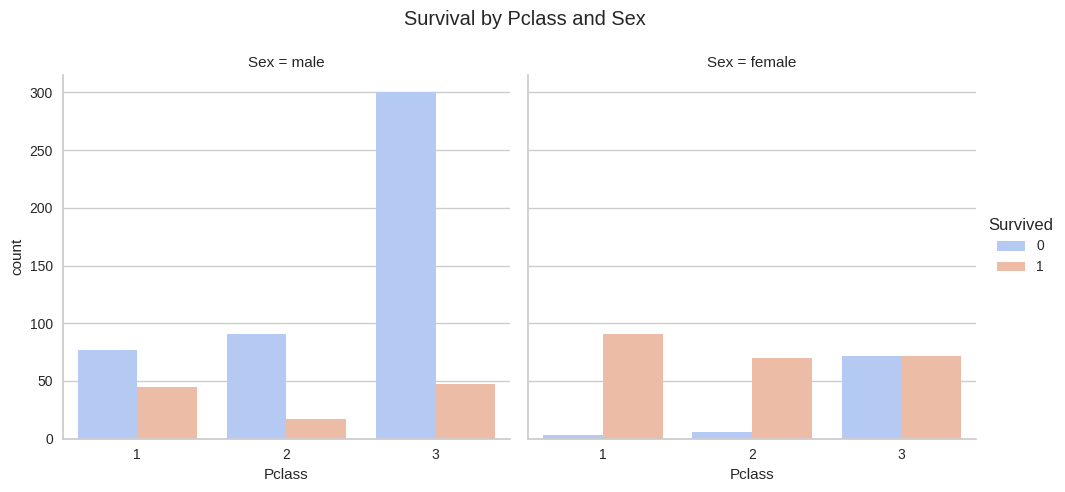

In [ ]:
plt.figure(figsize=(8, 6))
sns.catplot(x='Pclass', hue='Survived', col='Sex', kind='count', data=cat_train, palette='coolwarm')
plt.subplots_adjust(top=0.85)
plt.suptitle('Survival by Pclass and Sex')
plt.show()

#### **Image 4: Survival by Pclass and Sex**  
**Description:**  
The image shows survival count based on passenger class (Pclass) and sex.  
**Key Observations:**  
- Most males in **Pclass 3** did not survive.
- Most males in **Pclass 1** survived.
- Most females in **Pclass 1** survived.
- Most females in **Pclass 3** did not survive.  

**Conclusion:**  
The class of the passenger had a critical impact on survival chances. Higher-class passengers, especially females, had much higher chances of survival than those in lower classes.



---

### 16. **Simple Encoding**

- We encode categorical columns like `Sex` and `Embarked` into numerical values using `.map()` so that the models can handle them.


In [ ]:
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})



---
### 17. **Splitting the Data**

We will split the data into two parts:

- **X**: The features (all columns except for the target).
- **y**: The target column.

In [ ]:
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']



---

### 18. **Modeling**

- We will now use several models to predict whether passengers survived the Titanic disaster. The models we will use are:
  1. **Decision Tree Classifier**
  2. **K-Nearest Neighbors Classifier**
  3. **Naive Bayes Classifier**



---


#### ①  Decision Tree Classifier (DTC)


####**→ Create the Model**


In [ ]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC

DecisionTreeClassifier()

####**→  Defining the Parameter Grid**

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'max_features': [None, 'sqrt', 'log2', 0.5]
             }

####**→  Setting Up GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(DTC, param_grid, cv=5)
grid_search

####**→  Fitting the Model Using GridSearchCV**

In [ ]:
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_features': [None, 'sqrt', 'log2', 0.5]})

####**→  Retrieving the Best Parameters**

In [ ]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None}


####**→  Retrieving the Best Model**

In [ ]:
best_DTC = grid_search.best_estimator_
best_DTC

DecisionTreeClassifier(max_depth=5)

####**→  Evaluating the Model with Cross-Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_DTC, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)

Cross-Validation Accuracy Scores: [0.81564246 0.82022472 0.82022472 0.78089888 0.85393258]


####**→  Get Predictions using Cross-Validation**

In [ ]:
from sklearn.model_selection import cross_val_predict

DTC_predict = cross_val_predict(best_DTC, X, y, cv=5)

####**→  Accuracy-Score**

In [ ]:
from sklearn.metrics import accuracy_score

DTC_Accuracy = accuracy_score(y, DTC_predict)
print('Decision Tree Accuracy-score is:', DTC_Accuracy)

Decision Tree Accuracy-score is: 0.8181818181818182


####**→  Precision-Score**

In [ ]:
from sklearn.metrics import precision_score

DTC_Precision = precision_score(y, DTC_predict, average='weighted')
print('Decision Tree Precision-score is:', DTC_Precision)

Decision Tree Precision-score is: 0.8182771007422512


####**→  Recall-Score**

In [ ]:
from sklearn.metrics import recall_score

DTC_Recall = recall_score(y, DTC_predict, average='weighted')
print('Decision Tree Recall-score is:', DTC_Recall)

Decision Tree Recall-score is: 0.8181818181818182


####**→  F1-Score**

In [ ]:
from sklearn.metrics import f1_score

DTC_F1 = f1_score(y, DTC_predict, average='weighted')
print('Decision Tree F1-score is:', DTC_F1)

Decision Tree F1-score is: 0.814150875031704


####**→  Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

Confusion_matrix = confusion_matrix(y, DTC_predict)
Confusion_matrix

array([[498,  51],
       [111, 231]])

####**→  Heatmap**

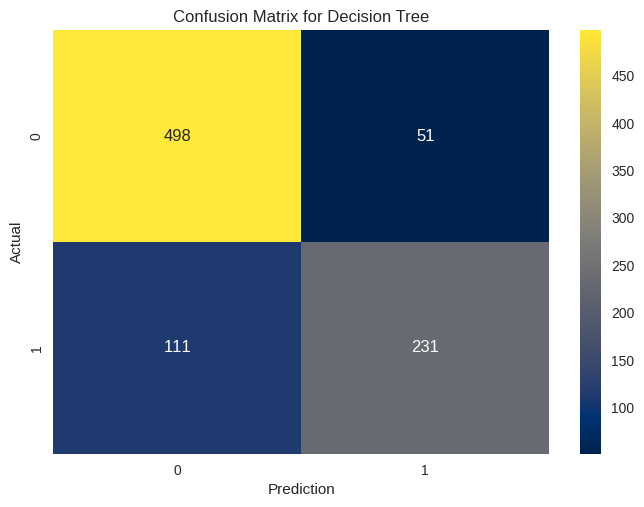

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(Confusion_matrix, annot=True, cmap='cividis', fmt='d')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

####**→  ROC Curve**

In [ ]:
from sklearn.metrics import roc_curve, auc

DTC_fpr, DTC_tpr, _ = roc_curve(y, DTC_predict)
DTC_fpr, DTC_tpr, _

(array([0.        , 0.09289617, 1.        ]),
 array([0.       , 0.6754386, 1.       ]),
 array([inf,  1.,  0.]))

####**→  AUC**

In [ ]:
DTC_auc = auc(DTC_fpr, DTC_tpr)
print(f'AUC: {DTC_auc:.2f}')

AUC: 0.79




---


#### ② K-Nearest Neighbors Classifier (KNN)


####**→ Create the Model**


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN

KNeighborsClassifier()

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
             }

####**→  Defining the Parameter Grid**

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(KNN , param_grid , cv=5)
grid_search

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

####**→  Fitting the Model Using GridSearchCV**

In [ ]:
grid_search.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

####**→  Retrieving the Best Parameters**

In [ ]:
print('Best Parameters:', grid_search.best_params_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


####**→  Retrieving the Best Model**


In [ ]:
best_KNN =grid_search.best_estimator_
best_KNN

KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')

####**→  Evaluating the Model with Cross-Validation**


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_KNN , X , y,cv=5)
print ('Cross-Validation Accuracy Scores:', cv_scores)

Cross-Validation Accuracy Scores: [0.67597765 0.74157303 0.75280899 0.74719101 0.7752809 ]


####**→  Get Predictions using Cross-Validation**


In [ ]:
from sklearn.model_selection import cross_val_predict

KNN_predict = cross_val_predict(best_KNN, X, y, cv=5)

####**→ Accuracy-Score**

In [ ]:
from sklearn.metrics import accuracy_score

KNN_Accuracy = accuracy_score(y , KNN_predict)
print('K-Nearest Neighbors Accuracy-score is:', KNN_Accuracy)

K-Nearest Neighbors Accuracy-score is: 0.7384960718294051


####**→  Precision-Score**

In [ ]:
from sklearn.metrics import precision_score

KNN_Precision = precision_score(y , KNN_predict , average='weighted')
print('K-Nearest Neighbors Precision-score is:', KNN_Precision)

K-Nearest Neighbors Precision-score is: 0.7357758925157044


####**→  Recall-Score**

In [ ]:
from sklearn.metrics import recall_score

KNN_Recall = recall_score(y , KNN_predict , average='weighted')
print('K-Nearest Neighbors Recall-score is:', KNN_Recall)

K-Nearest Neighbors Recall-score is: 0.7384960718294051


####**→  F1-Score**

In [ ]:
from sklearn.metrics import f1_score

KNN_F1 = f1_score(y , KNN_predict , average='weighted')
print('K-Nearest Neighbors F1-score is:', KNN_F1)

K-Nearest Neighbors F1-score is: 0.7366291470634226


####**→  ROC Curve**

In [ ]:
from sklearn.metrics import roc_curve, auc

KNN_fpr, KNN_tpr, _ = roc_curve(y, KNN_predict)
KNN_fpr, KNN_tpr, _

(array([0.        , 0.19125683, 1.        ]),
 array([0.        , 0.62573099, 1.        ]),
 array([inf,  1.,  0.]))

####**→  AUC**

In [ ]:
KNN_auc = auc(KNN_fpr, KNN_tpr)
print(f'AUC: {KNN_auc:.2f}')

AUC: 0.72




---


#### ③ Naive Bayes Classifier (NB)

#### **→  Create the Model**

In [ ]:
from sklearn.naive_bayes import BernoulliNB

NB = BernoulliNB()
NB

BernoulliNB()

####**→  Defining the Parameter Grid**

In [ ]:
param_grid = {'alpha':[0.1, 0.5, 1.0, 2.0, 5.0]}

####**→ Setting Up GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV (NB ,param_grid , cv=5)
grid_search

GridSearchCV(cv=5, estimator=BernoulliNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]})

####**→ Fitting the Model Using GridSearchCV**

In [ ]:
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=BernoulliNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]})

####**→ Retrieving the Best Parameters**

In [ ]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'alpha': 0.1}


####**→ Retrieving the Best Model**

In [ ]:
best_NB = grid_search.best_estimator_
best_NB

BernoulliNB(alpha=0.1)

####**→ Evaluating the Model with Cross-Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_NB , X ,y ,cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)

Cross-Validation Accuracy Scores: [0.80446927 0.80337079 0.78651685 0.75280899 0.78651685]


####**Get Predictions using Cross-Validation**

In [ ]:
from sklearn.model_selection import cross_val_predict

NB_predict = cross_val_predict(best_NB, X, y, cv=5)

####**→ Accuracy-Score**

In [ ]:
from sklearn.metrics import accuracy_score

NB_Accuracy = accuracy_score(y, NB_predict)
print('Naive Bayes Accuracy-score is:', NB_Accuracy)

Naive Bayes Accuracy-score is: 0.7867564534231201


####**→ Pricesion-Score**

In [ ]:
from sklearn.metrics import precision_score

NB_Precision = precision_score(y , NB_predict , average='weighted')
print('Naive Bayes Precision-score is:', NB_Precision)

Naive Bayes Precision-score is: 0.7845864176654891


####**→ Recall-Score**

In [ ]:
from sklearn.metrics import recall_score

NB_Recall = recall_score(y , NB_predict , average='weighted')
print('Naive Bayes Recall-score is:', NB_Recall)

Naive Bayes Recall-score is: 0.7867564534231201


####**→ F1-Score**

In [ ]:
from sklearn.metrics import f1_score

NB_F1 = f1_score(y , NB_predict , average='weighted')
print('Naive Bayes F1-score is:', NB_F1)

Naive Bayes F1-score is: 0.7848568647966473


####**→  ROC Curve**

In [ ]:
from sklearn.metrics import roc_curve, auc

NB_fpr, NB_tpr, _ = roc_curve(y, NB_predict)
NB_fpr, NB_tpr, _

(array([0.        , 0.14754098, 1.        ]),
 array([0.        , 0.68128655, 1.        ]),
 array([inf,  1.,  0.]))

####**→  AUC**

In [ ]:
NB_auc = auc(NB_fpr, NB_tpr)
print(f'AUC: {NB_auc:.2f}')

AUC: 0.77


---

###19.  **Model Comparison**

In this section, we will present a comparison between the different models based on the results of **Accuracy**, **Precision**, **Recall**, **F1-Score**, and **AUC**.


In [ ]:
model_comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'Naive Bayes', 'K-Nearest Neighbors'],
    'Accuracy': [DTC_Accuracy, KNN_Accuracy, NB_Accuracy],
    'Precision': [DTC_Precision, KNN_Precision, NB_Precision],
    'Recall': [DTC_Recall, KNN_Recall, NB_Recall],
    'F1-Score': [DTC_F1, KNN_F1, NB_F1],
    'AUC':[DTC_auc , KNN_auc , NB_auc]
})

In [ ]:
model_comparison = model_comparison.sort_values(by='Accuracy', ascending=False)

model_comparison

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Decision Tree,0.818182,0.818277,0.818182,0.814151,0.791271
2,K-Nearest Neighbors,0.786756,0.784586,0.786756,0.784857,0.766873
1,Naive Bayes,0.738496,0.735776,0.738496,0.736629,0.717237


### **Final Results:**

After applying three different models (Decision Tree, K-Nearest Neighbors, Naive Bayes) to the training data `df_train`, we compared their performance using various metrics such as **Accuracy**, **Precision**, **Recall**, **F1-Score**, and **AUC**.

#### **Decision Tree:**
- The **Decision Tree** model performed the best overall.
- It achieved the highest scores in all metrics, including **Accuracy**, **Precision**, **Recall**, and **AUC**.

#### **K-Nearest Neighbors:**
- **K-Nearest Neighbors** ranks second.
- While its performance is strong, the difference in scores between it and the **Decision Tree** is not significant.

#### **Naive Bayes:**
- **Naive Bayes** performed the weakest.
- It was the least favorable model based on all metrics and is not the best choice for this task.

### **Conclusion:**
- Given that the **Decision Tree** is the best model, we will now proceed to apply it to the test data (`df_test`) to generate the final predictions for the passengers.



---

###20. **Applying the Best Model to Test Data**



#### **→ Displaying the Test Data Columns**

- The goal of this step is to make sure we know the available columns in the data and ensure they match the columns used during the model training.


In [ ]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


#### **→ Excluding the `PassengerId` Column**

- In this step, we exclude the `PassengerId` column because it does not serve as a feature for prediction; it is simply a unique identifier for each passenger. We only want to use the relevant features (columns) for making predictions.


In [ ]:
feature_columns = [col for col in df_test.columns if col != 'PassengerId']

#### **→ Making Predictions Using the Best Model**

- We use the best trained model to predict the `"Survived"` outcome for the test data.


In [ ]:
predictions = best_DTC.predict(df_test[feature_columns])

#### **→ Creating a DataFrame to Display the Results**

- To prepare the data for proper display and saving, we create a new **DataFrame** containing the passenger IDs (`PassengerId`) and the resulting predictions:


In [ ]:
output = pd.DataFrame()

output['PassengerId'] = df_test['PassengerId']
output['Survived'] = predictions

#### **→ Displaying the Final Results**

- This displays the **Passenger IDs** along with the **predictions** for each passenger.
- The final structure of the data will be two columns: the first being `PassengerId`, and the second being `Survived`, which contains the predicted values (0 or 1).


In [ ]:
output

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0




---


###21.  **Saving Predictions to CSV**

In [ ]:
output.to_csv('titanic_predictions.csv', index=False)